In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

In [3]:
def descriptive_statistics(data):
    
    mean_value = np.mean(data)
    max_value = np.max(data)
    min_value = np.min(data)
    stdev = np.std(data, ddof=1)
    std_error = stdev/np.sqrt(len(data))
    
    descriptive_stats = [mean_value, max_value, min_value, stdev, std_error]
    
    return descriptive_stats

In [21]:
data_2min_flush = pd.read_csv('FlintPb_VirginiaTech_2min.csv')
multiple_draws = pd.read_csv('Lab07_FlintPb_VirginiaTech.csv')
Sample_ID = np.array(data_2min_flush['SampleID'])

concentration_first_draw = np.array(multiple_draws['Pb Bottle 1 (ppb) - First Draw'])
concentration_45sec_flush = np.array(multiple_draws['Pb Bottle 2 (ppb) - 45 secs flushing'])
concentration_2min_flush = np.array(data_2min_flush['Pb Bottle 3 (ppb) - 2 mins flushing'])


log_sorted_concentration_2min_flush = np.log10(sorted_concentration_2min_flush)
log_sorted_concentration_first_draw = np.log10(sorted_concentration_first_draw)
log_sorted_concentration_45sec_flush = np.log10(sorted_concentration_45sec_flush)

log_concentration_2min_flush = np.log10(concentration_2min_flush)
log_concentration_first_draw = np.log10(concentration_first_draw)
log_concentration_45sec_flush = np.log10(concentration_45sec_flush)

descriptive_statistics_2min_flush = descriptive_statistics(concentration_2min_flush)









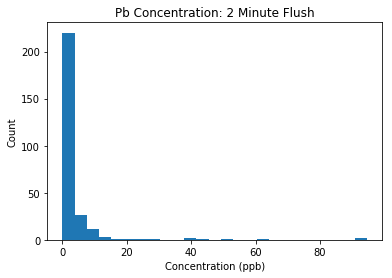

In [10]:
num_bins = 25

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Concentration (ppb)')
ax1.set_ylabel('Count')
ax1.hist(sorted_concentration_2min_flush, bins = num_bins)
ax1.set_title('Pb Concentration: 2 Minute Flush')
plt.show()



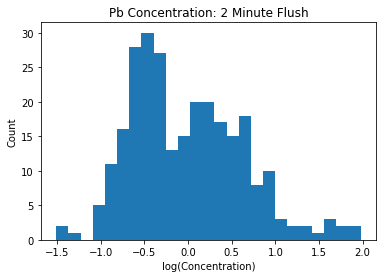

In [11]:
num_bins = 25

fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.set_xlabel('log(Concentration)')
ax2.set_ylabel('Count')
ax2.hist(log_sorted_concentration_2min_flush, bins = num_bins)
ax2.set_title('Pb Concentration: 2 Minute Flush')
plt.show()

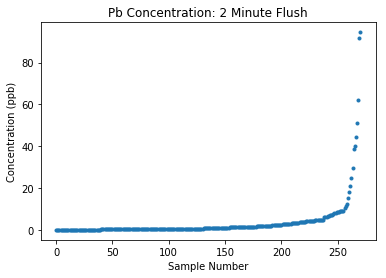

In [12]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.set_xlabel('Sample Number')
ax3.set_ylabel('Concentration (ppb)')
ax3.plot(range(len(concentration_2min_flush)), sorted_concentration_2min_flush, 'o', markersize = 3)
ax3.set_title('Pb Concentration: 2 Minute Flush')
plt.show()

In [13]:
#Influence of suspected outliers on the mean and median

adjusted_means = []
adjusted_medians = []
N_adjustments = 20

for n in range(N_adjustments+1):
    
    if n == 0:
        
        new_mean = np.mean(sorted_concentration_2min_flush)
        new_median = np.median(sorted_concentration_2min_flush)
    
        adjusted_means.append(new_mean)
        adjusted_medians.append(new_median)
        
    else: 
        new_mean = np.mean(sorted_concentration_2min_flush[:-n])
        new_median = np.median(sorted_concentration_2min_flush[:-n])
    
        adjusted_means.append(new_mean)
        adjusted_medians.append(new_median)
        

    
    



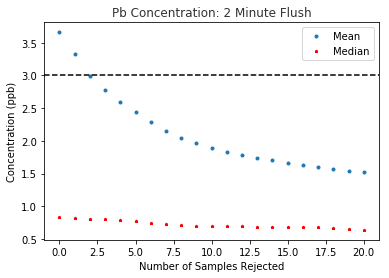

In [14]:
fig = plt.figure()
ax4 = fig.add_subplot(111)
ax4.set_xlabel('Number of Samples Rejected')
ax4.set_ylabel('Concentration (ppb)')
ax4.plot(range(len(adjusted_means)), adjusted_means, 'o', markersize = 3, label = 'Mean')
ax4.plot(range(len(adjusted_means)), adjusted_medians, '*', markersize = 3, label = 'Median', color = 'red')
ax4.set_title('Pb Concentration: 2 Minute Flush', alpha = 0.8)
ax4.axhline(3, linestyle = '--', color = 'k')
plt.legend(loc = 0)
plt.show()

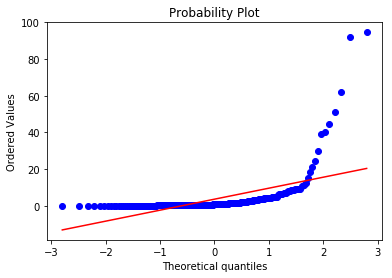

In [15]:
ax4 = plt.subplot(111)
res = stats.probplot(sorted_concentration_2min_flush, plot=plt)


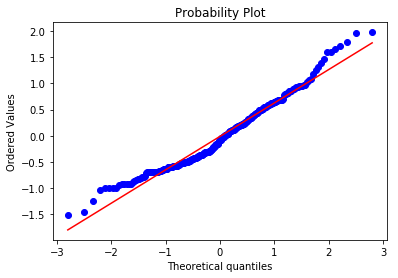

In [16]:
ax4 = plt.subplot(111)
res = stats.probplot(log_sorted_concentration_2min_flush, plot=plt)

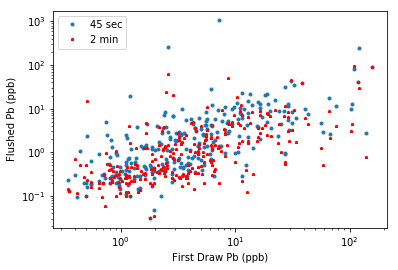

In [26]:
fig = plt.figure()
ax5 = fig.add_subplot(111)
ax5.set_xlabel('First Draw Pb (ppb)')
ax5.set_ylabel('Flushed Pb (ppb)')
ax5.loglog(concentration_first_draw, concentration_45sec_flush, 'o', markersize = 3, label = '45 sec')
ax5.loglog(concentration_first_draw, concentration_2min_flush, '*', markersize = 3, label = '2 min', color = 'red')
plt.legend(loc = 0)
plt.show()

In [80]:
number_model_parameters = 2
G = np.ones((len(concentration_45sec_flush), number_model_parameters))
G[:, 0] = log_concentration_first_draw
d = log_concentration_45sec_flush
Gd = np.dot(G.T, d)
H = np.dot(G.T, G)
mest = np.dot(np.linalg.inv(H), Gd)
print(mest)


[ 0.85396297 -0.30506728]


In [83]:
def Least_Squares_Fit(number_model_parameters, data, observations):
    
    G = np.ones((len(observations), number_model_parameters))
    G[:, 0] = observations
    d = data
    Gd = np.dot(G.T, d)
    H = np.dot(G.T, G)
    H_inv = np.linalg.inv(H)
    m_est  = np.dot(H_inv, Gd)
    m_est = m_est.flatten()
    
    return m_est
    
    

In [85]:
m_est_45sec = Least_Squares_Fit(number_model_parameters, log_concentration_45sec_flush, log_concentration_first_draw)
m_est_2min = Least_Squares_Fit(number_model_parameters, log_concentration_2min_flush, log_concentration_first_draw)




In [86]:
d_est_45sec = m_est_45sec[0]*log_concentration_first_draw+m_est_45sec[1]
d_est_2min = m_est_2min[0]*log_concentration_first_draw+m_est_2min[1]

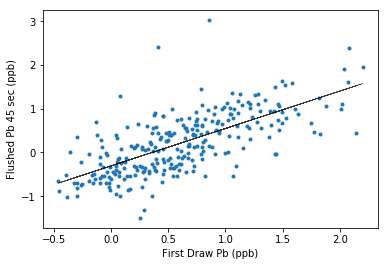

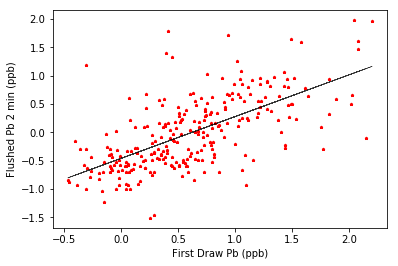

In [89]:
fig = plt.figure()
fig.subplots_adjust(hspace=1)
ax5 = fig.add_subplot(111)
ax5.set_xlabel('First Draw Pb (ppb)')
ax5.set_ylabel('Flushed Pb 45 sec (ppb)')
ax5.plot(log_concentration_first_draw, log_concentration_45sec_flush, 'o', markersize = 3, label = '45 sec')
ax5.plot(log_concentration_first_draw, d_est_45sec, '-', linewidth = 0.5, alpha = 0.8, color = 'k')
plt.show()

fig = plt.figure()
ax6 = fig.add_subplot(111)
ax6.set_xlabel('First Draw Pb (ppb)')
ax6.set_ylabel('Flushed Pb 2 min (ppb)')
ax6.plot(log_concentration_first_draw, log_concentration_2min_flush, '*', markersize = 3, label = '2 min', color = 'red')
ax6.plot(log_concentration_first_draw, d_est_2min, '-', linewidth = 0.5, alpha = 0.8, color = 'k')
plt.show()